In [ ]:
# Telco Churn Feature Engineering

# İş Problemi

# Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli 
# geliştirilmesi istenmektedir. Modeli geliştirmeden önce gerekli olan veri analizi
# ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.

# Telco müşteri kaybı verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali
# bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu
# gösterir.

# 21 Değişken 7043 Gözlem 977.5 KB

# CustomerId Müşteri İd’si
# Gender Cinsiyet
# SeniorCitizen Müşterinin yaşlı olup olmadığı (1, 0)
# Partner Müşterinin bir ortağı olup olmadığı (Evet, Hayır)
# Dependents Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır
# tenure Müşterinin şirkette kaldığı ay sayısı
# PhoneService Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
# MultipleLines Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
# InternetService Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
# OnlineSecurity Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# OnlineBackup Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# DeviceProtection Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# TechSupport Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
# StreamingTV Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# StreamingMovies Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# Contract Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
# PaperlessBilling Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
# PaymentMethod Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
# MonthlyCharges Müşteriden aylık olarak tahsil edilen tutar
# TotalCharges Müşteriden tahsil edilen toplam tutar
# Churn Müşterinin kullanıp kullanmadığı (Evet veya Hayır)

                                    
# Veri Seti Hikayesi

                                                                     
# Görev 1 : Keşifçi Veri Analizi
# Adım 1: Genel resmi inceleyiniz.
# Adım 2: Numerik ve kategorik değişkenleri yakalayınız.
# Adım 3: Numerik ve kategorik değişkenlerin analizini yapınız.
# Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre 
# numerik değişkenlerin ortalaması)
# Adım 5: Aykırı gözlem analizi yapınız.
# Adım 6: Eksik gözlem analizi yapınız.
# Adım 7: Korelasyon analizi yapınız.

# Görev 2 : Feature Engineering
# Adım 1: Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.
# Adım 2: Yeni değişkenler oluşturunuz.
# Adım 3: Encoding işlemlerini gerçekleştiriniz.
# Adım 4: Numerik değişkenler için standartlaştırma yapınız.
# Adım 5: Model oluşturunuz.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

## Proje Görevleri


In [ ]:
# #### Görev 1 : Keşifçi Veri Analizi
# Adım 1: Genel resmi inceleyiniz.
# Adım 2: Numerik ve kategorik değişkenleri yakalayınız.
# Adım 3: Numerik ve kategorik değişkenlerin analizini yapınız.
# Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre 
# numerik değişkenlerin ortalaması)
# Adım 5: Aykırı gözlem analizi yapınız.
# Adım 6: Eksik gözlem analizi yapınız.
# Adım 7: Korelasyon analizi yapınız.

In [566]:
def load():
    #data = pd.read_csv("diabetes.csv")
    data = pd.read_csv("Telco-Customer-Churn.csv")
    #data = pd.read_csv("C:\\Users\\Msı\\Desktop\\Kaggle\\df_created2_29072022",index_col=0)
    return data

df = load()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,Yes


In [559]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [540]:
target="Churn"

In [560]:
df.loc[df[df["Churn"]=="Yes"].index,"Churn"]=1
df.loc[df[df["Churn"]=="No"].index,"Churn"]=0
df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: object

In [454]:
def grab_col_names(dataframe):
    
    cat_th=len(df)//20
    car_th=len(df)//20
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}'," ---- ",cat_cols)
    print(f'num_cols: {len(num_cols)}'," ---- ",num_cols)
    print(f'cat_but_car: {len(cat_but_car)}'," ---- ",cat_but_car)
    print(f'num_but_cat: {len(num_but_cat)}'," ---- ",num_but_cat)
    
    
    
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 18  ----  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen', 'tenure']
num_cols: 1  ----  ['MonthlyCharges']
cat_but_car: 2  ----  ['customerID', 'TotalCharges']
num_but_cat: 2  ----  ['SeniorCitizen', 'tenure']


        gender  Ratio
Male      3555 50.476
Female    3488 49.524
---------------------------------------------------------------------------------------------------


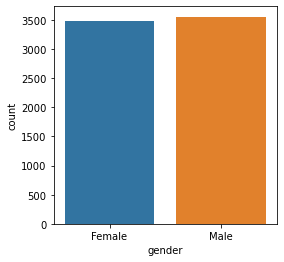

###################################################################################################
     Partner  Ratio
No      3641 51.697
Yes     3402 48.303
---------------------------------------------------------------------------------------------------


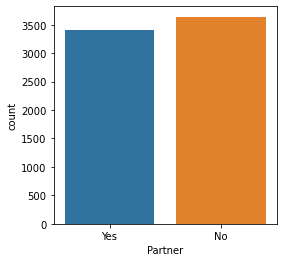

###################################################################################################
     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959
---------------------------------------------------------------------------------------------------


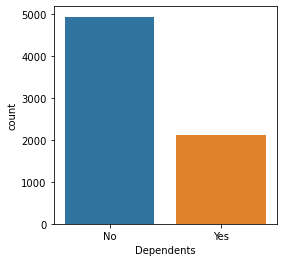

###################################################################################################
     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683
---------------------------------------------------------------------------------------------------


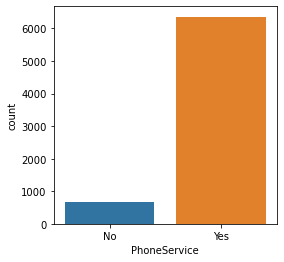

###################################################################################################
                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
---------------------------------------------------------------------------------------------------


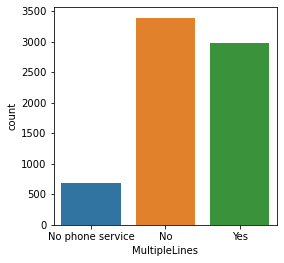

###################################################################################################
             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
---------------------------------------------------------------------------------------------------


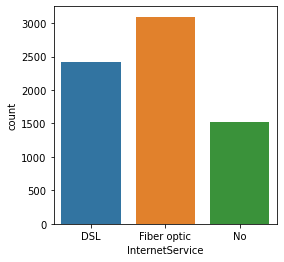

###################################################################################################
                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
---------------------------------------------------------------------------------------------------


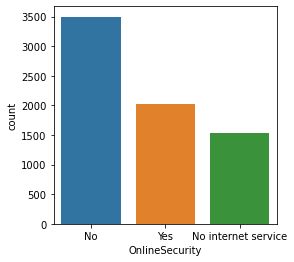

###################################################################################################
                     OnlineBackup  Ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
---------------------------------------------------------------------------------------------------


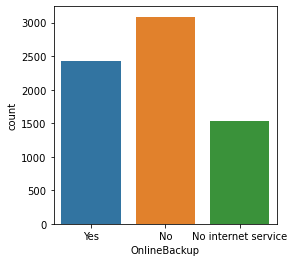

###################################################################################################
                     DeviceProtection  Ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
---------------------------------------------------------------------------------------------------


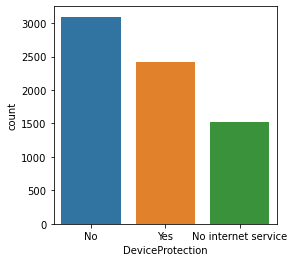

###################################################################################################
                     TechSupport  Ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
---------------------------------------------------------------------------------------------------


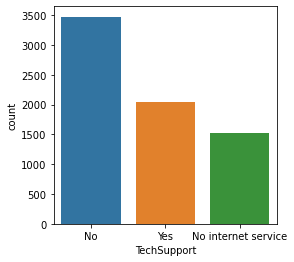

###################################################################################################
                     StreamingTV  Ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
---------------------------------------------------------------------------------------------------


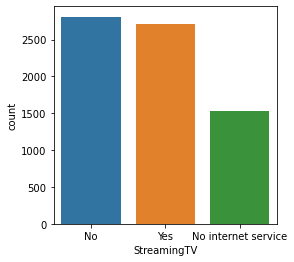

###################################################################################################
                     StreamingMovies  Ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
---------------------------------------------------------------------------------------------------


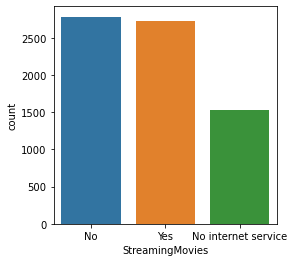

###################################################################################################
                Contract  Ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
---------------------------------------------------------------------------------------------------


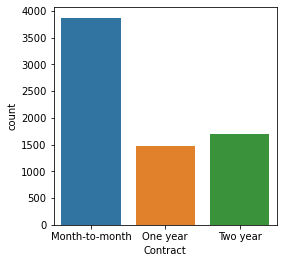

###################################################################################################
     PaperlessBilling  Ratio
Yes              4171 59.222
No               2872 40.778
---------------------------------------------------------------------------------------------------


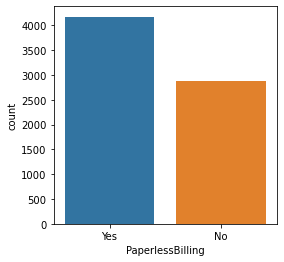

###################################################################################################
                           PaymentMethod  Ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
---------------------------------------------------------------------------------------------------


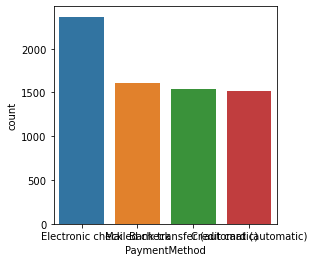

###################################################################################################
   Churn  Ratio
0   5174 73.463
1   1869 26.537
---------------------------------------------------------------------------------------------------


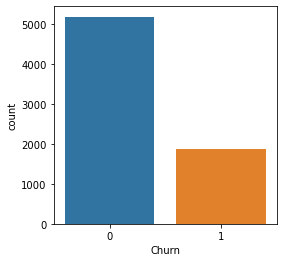

###################################################################################################
   SeniorCitizen  Ratio
0           5901 83.785
1           1142 16.215
---------------------------------------------------------------------------------------------------


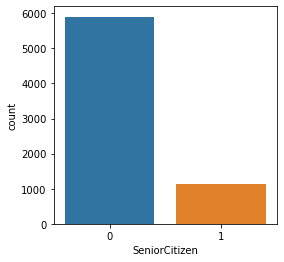

###################################################################################################
    tenure  Ratio
1      613  8.704
72     362  5.140
2      238  3.379
3      200  2.840
4      176  2.499
71     170  2.414
5      133  1.888
7      131  1.860
8      123  1.746
70     119  1.690
---------------------------------------------------------------------------------------------------


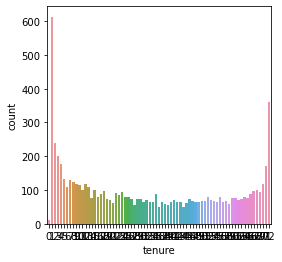

###################################################################################################


In [455]:
def cat_summary(dataframe,col_name,plot=False,
                added_new_features_for_figsize=5,
                print_first_x_rows=10):
    """
    Veri setindeki değişkenlerin değerlerinin kaç tane var olduğunu ve oranını gösterir 
    
    Parameters
    ----------
    dataframe: dataframe
        Değişken isimleri alınmak istenen dataframe'dir
    col_name: str
        dataframe'e ait kolon isimleri
    plot: bool
        Çizim yapılıp yapılmamasına karar verir
    added_new_features_for_figsize: int
        Çizim yapılacaksa resim büyüklüğünü ayarlar
    
    Returns
    -------
        
    Notes
    -------
    Çok büyük veri göndermek çıktının gecikmesine sebep olacaktır.
    
    Examples
    --------
    for col in df.columns:
        if df[col].dtypes=="bool":
            df[col]=df[col].astype(int)
        cat_summary(df,col,plot=True,added_new_features_for_figsize=4)
    
    """ 
    size=added_new_features_for_figsize
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(dropna=False).iloc[:print_first_x_rows],
                       "Ratio": 100*dataframe[col_name].value_counts(dropna=False).iloc[:print_first_x_rows]/len(dataframe)}))
    
    print("-"*99)
    if plot:
        plt.rcParams['figure.figsize']=(size,size)
        sns.countplot(x=dataframe[col_name],data=dataframe)
        plt.show(block=True)
    print("#"*99)
    
#for col in df.columns:
for col in cat_cols:
    #pd.concat([df[col].value_counts(dropna=False,normalize=True),df[col].value_counts(dropna=False)],axis=1)*100
    # bool olanda hata vermesin diye. aslında df e ilk başta bunu uygulamak daha mantıklı
    if df[col].dtypes=="bool":
        df[col]=df[col].astype(int)
    cat_summary(df,col,plot=True,added_new_features_for_figsize=4,print_first_x_rows=10)

In [456]:
def check_df(dataframe,head=5):
    
    """
    Veri setine genel bir bakış atmak için kullanılır.
    
    Parameters
    ----------
    dataframe: dataframe
        Değişken isimleri alınmak istenen dataframe'dir
    head: int
        İlk ve son kaç satır gözlenmek istendiğini belirtir
    
    Returns
    -------
        
    Notes
    -------
    
    Examples
    --------
    
    
    """    
    
    print("\n##########################################################  Shape  ##########################################################\n")
    print(dataframe.shape)
    
    print("\n##########################################################  Types  ##########################################################\n")
    print(dataframe.dtypes)
    
    print("\n##########################################################  Head  ##########################################################\n")
    print(dataframe.head(head))
    
    print("\n##########################################################  Tail  ##########################################################\n")
    print(dataframe.tail(head))
    
    print("\n##########################################################  NA  ##########################################################\n")
    print(dataframe.isnull().sum().sort_values())
    
    print("\n##########################################################  Quantiles  ##########################################################\n")
    print(dataframe.describe([0,0.05,0.95,0.99,1]).T)
    print("\n##########################################################  -------  ##########################################################\n")
    
check_df(df,head=5)


##########################################################  Shape  ##########################################################

(7043, 21)

##########################################################  Types  ##########################################################

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##########################################################  Head  ##########################################################

   c

In [458]:
def find_col_modes(df,col,target):
    col_df_modes=pd.concat([df[col].value_counts(dropna=False,normalize=True),
                            df[col].value_counts(dropna=False)],axis=1)
    col_df_modes["modes"]=col_df_modes.index
    col_df_modes.columns=["modes_rate","modes_count","modes"]
    col_df_modes

    col_df_modes2=df.groupby([col]).agg({target:["mean"] })
    col_df_modes2.columns=["mean"]
    col_df_modes2["modes"]=col_df_modes2.index

    col_df_modes=col_df_modes.merge(col_df_modes2, on="modes")
    col_df_modes=col_df_modes[["modes","mean","modes_rate","modes_count"]]
    return col_df_modes
col_df_modes=find_col_modes(df,col=cat_cols[0],target=target)
col_df_modes

,modes,mean,modes_rate,modes_count
0,Male,0.262,0.505,3555
1,Female,0.269,0.495,3488


In [459]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,1


In [460]:
def find_col_modes(df,col,target):
    col_df_modes=pd.concat([df[col].value_counts(dropna=False,normalize=True),
                            df[col].value_counts(dropna=False),],axis=1)
    col_df_modes["modes"]=col_df_modes.index
    col_df_modes.columns=["modes_rate","modes_count","modes"]
    col_df_modes

    col_df_modes2=df.groupby([col]).agg({target:["mean"] })
    col_df_modes2.columns=["mean"]
    col_df_modes2["modes"]=col_df_modes2.index

    col_df_modes=col_df_modes.merge(col_df_modes2, on="modes")
    col_df_modes=col_df_modes[["modes","mean","modes_rate","modes_count"]]
    return col_df_modes
col_df_modes=find_col_modes(df,col=cat_cols[0],target=target)
col_df_modes

,modes,mean,modes_rate,modes_count
0,Male,0.262,0.505,3555
1,Female,0.269,0.495,3488


In [438]:
# df = load()
# df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1


In [462]:
def find_col_modes(df,col,target):
    col_df_modes=pd.concat([df[col].value_counts(dropna=False,normalize=True),  # modes_rate
                            df[col].value_counts(dropna=False),],axis=1)  # modes_count

    col_df_modes.columns=["modes_rate","modes_count"]  # değişkenlere isimler atıyorum

    col_df_modes["modes"]=col_df_modes.index  #index te olan mode ları değişken olarak atıyorum

    col_df_modes2=df.groupby([col]).agg({target:["mean"] })
    col_df_modes2.columns=["target_mean"]
    col_df_modes2["modes"]=col_df_modes2.index
    col_df_modes2  # hedef değişkene ait mean değerlerinden yeni bir df oluşturuyorum

    col_df_modes=col_df_modes.merge(col_df_modes2, on="modes") # oluşan iki df i birleştiriyorum
    col_df_modes

    # değişkenleri istediğim sıraya göre yeniden sıralıyorum
    col_df_modes=col_df_modes[["modes","target_mean","modes_rate","modes_count"]] 

    col_df_modes["dtypes"]=df[col].dtypes
    col_df_modes["col_isna_rate"]=df[col].isna().sum()/len(df)
    col_df_modes["col_notna_rate"]=df[col].notna().sum()/len(df)
    col_df_modes["nunique"]=df[col].nunique()
    col_df_modes["uniques"]=str(df[col].unique())

    return col_df_modes
col_df_modes=find_col_modes(df,col=cat_cols[0],target=target)
col_df_modes

,modes,target_mean,modes_rate,modes_count,dtypes,col_isna_rate,col_notna_rate,nunique,uniques
0,Male,0.262,0.505,3555,object,0.000,1.000,2,['Female' 'Male']
1,Female,0.269,0.495,3488,object,0.000,1.000,2,['Female' 'Male']


In [468]:
def col_df_modes_all_fonk(df,col=cat_cols[0],target="Outcome"):
    col_df_modes_all=pd.DataFrame()
    for col in df.columns:
        if (df[col].nunique()<len(df)//20) and col !=target:
            col_df_modes=find_col_modes(df,col=col,target=target)
            col_df_modes.insert(0, "col",0)
            col_df_modes["col"]=col
            col_df_modes_all=pd.concat([col_df_modes_all,col_df_modes],axis=0)
            col_df_modes_all.index=range(len(col_df_modes_all))
    return col_df_modes_all
col_df_modes_all=col_df_modes_all_fonk(df,col=cat_cols[0],target=target)
col_df_modes_all

,col,modes,target_mean,modes_rate,modes_count,dtypes,col_isna_rate,col_notna_rate,nunique,uniques
0,gender,Male,0.262,0.505,3555,object,0.000,1.000,2,['Female' 'Male']
1,gender,Female,0.269,0.495,3488,object,0.000,1.000,2,['Female' 'Male']
2,SeniorCitizen,0,0.236,0.838,5901,int64,0.000,1.000,2,[0 1]
3,SeniorCitizen,1,0.417,0.162,1142,int64,0.000,1.000,2,[0 1]
4,Partner,No,0.330,0.517,3641,object,0.000,1.000,2,['Yes' 'No']
...,...,...,...,...,...,...,...,...,...,...
111,PaperlessBilling,No,0.163,0.408,2872,object,0.000,1.000,2,['Yes' 'No']
112,PaymentMethod,Electronic check,0.453,0.336,2365,object,0.000,1.000,4,['Electronic check' 'Mailed check' 'Bank trans...
113,PaymentMethod,Mailed check,0.191,0.229,1612,object,0.000,1.000,4,['Electronic check' 'Mailed check' 'Bank trans...
114,PaymentMethod,Bank transfer (automatic),0.167,0.219,1544,object,0.000,1.000,4,['Electronic check' 'Mailed check' 'Bank trans...


In [466]:
df[target].mean()

0.2653698707936959

In [469]:
col_df_modes_all[col_df_modes_all["target_mean"]<0.2][col_df_modes_all["modes_rate"]>0.03]

,col,modes,target_mean,modes_rate,modes_count,dtypes,col_isna_rate,col_notna_rate,nunique,uniques
5,Partner,Yes,0.197,0.483,3402,object,0.000,1.000,2,['Yes' 'No']
7,Dependents,Yes,0.155,0.300,2110,object,0.000,1.000,2,['No' 'Yes']
9,tenure,72,0.017,0.051,362,int64,0.000,1.000,73,[ 1 34 2 45 8 22 10 28 62 13 16 58 49 25 69 ...
87,InternetService,DSL,0.190,0.344,2421,object,0.000,1.000,3,['DSL' 'Fiber optic' 'No']
88,InternetService,No,0.074,0.217,1526,object,0.000,1.000,3,['DSL' 'Fiber optic' 'No']
90,OnlineSecurity,Yes,0.146,0.287,2019,object,0.000,1.000,3,['No' 'Yes' 'No internet service']
91,OnlineSecurity,No internet service,0.074,0.217,1526,object,0.000,1.000,3,['No' 'Yes' 'No internet service']
94,OnlineBackup,No internet service,0.074,0.217,1526,object,0.000,1.000,3,['Yes' 'No' 'No internet service']
97,DeviceProtection,No internet service,0.074,0.217,1526,object,0.000,1.000,3,['No' 'Yes' 'No internet service']
99,TechSupport,Yes,0.152,0.290,2044,object,0.000,1.000,3,['No' 'Yes' 'No internet service']


In [470]:
col_df_modes_all[col_df_modes_all["target_mean"]>0.5][col_df_modes_all["modes_rate"]>0.03]

,col,modes,target_mean,modes_rate,modes_count,dtypes,col_isna_rate,col_notna_rate,nunique,uniques
8,tenure,1,0.620,0.087,613,int64,0.000,1.000,73,[ 1 34 2 45 8 22 10 28 62 13 16 58 49 25 69 ...
10,tenure,2,0.517,0.034,238,int64,0.000,1.000,73,[ 1 34 2 45 8 22 10 28 62 13 16 58 49 25 69 ...


In [471]:
def df_col_analize_(df,target):

    df_col_analize=pd.DataFrame([[col,df[col].dtypes,df[col].nunique(),df[col].unique(),
                   df[col].isna().sum(),df[col].notna().sum(),
                  find_col_modes(df,col=col,target=target)] 
                  for col in df.columns ],
                 columns=["cols","dtypes","nunique","unique","isna_sum","notna_sum","modes"]).sort_values(by="nunique")
    return df_col_analize
df_col_analize=df_col_analize_(df,target=target)
df_col_analize

,cols,dtypes,nunique,unique,isna_sum,notna_sum,modes
20,Churn,object,2,"[0, 1]",0,7043,modes target_mean modes_rate modes_count...
1,gender,object,2,"[Female, Male]",0,7043,modes target_mean modes_rate modes_coun...
2,SeniorCitizen,int64,2,"[0, 1]",0,7043,modes target_mean modes_rate modes_count...
3,Partner,object,2,"[Yes, No]",0,7043,modes target_mean modes_rate modes_count ...
4,Dependents,object,2,"[No, Yes]",0,7043,modes target_mean modes_rate modes_count ...
16,PaperlessBilling,object,2,"[Yes, No]",0,7043,modes target_mean modes_rate modes_count ...
6,PhoneService,object,2,"[No, Yes]",0,7043,modes target_mean modes_rate modes_count ...
15,Contract,object,3,"[Month-to-month, One year, Two year]",0,7043,modes target_mean modes_rate mo...
14,StreamingMovies,object,3,"[No, Yes, No internet service]",0,7043,modes target_mean modes_rat...
13,StreamingTV,object,3,"[No, Yes, No internet service]",0,7043,modes target_mean modes_rat...


In [473]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,1


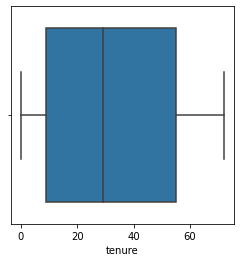

In [484]:
###################
# Grafik Teknikle Aykırı Değerler
###################

sns.boxplot(x=df["tenure"])
plt.show()

In [477]:
###################
# Aykırı Değerler Nasıl Yakalanır?
###################

q1 = df["tenure"].quantile(0.25)
q3 = df["tenure"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

df[(df["tenure"] < low) | (df["tenure"] > up)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [478]:
def outlier_thresholds(dataframe, col_name, q1=0.03, q3=0.97):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "tenure")

(-105.5, 178.5)

In [479]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [480]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

grab_outliers(df, "tenure")

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [481]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

# for col in num_cols:
#     new_df = remove_outlier(df, col)

In [485]:
def replace_with_thresholds(dataframe, variable):
    #hata: buraya oran orantı ile thresoldları ata. tek sayı ile değiştirme  #!!!!!!!!!!!!!!!!!!!!!!!!!!
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

outlier_thresholds(df, "tenure")
check_outlier(df, "tenure")
grab_outliers(df, "tenure", index=True)

remove_outlier(df, "tenure").shape
replace_with_thresholds(df, "tenure")
check_outlier(df, "tenure")

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


False

In [487]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,0


In [542]:
dff=pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
dff

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1
0,0,1,29.850,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.950,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.850,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.300,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.700,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.800,1,1,1,1,0,1,0,0,0,...,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.200,0,1,1,1,0,1,1,0,0,...,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.600,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.400,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0,1,1


In [488]:
# istisna olan PassengerId değişkenini siliyoruz----------------------------date, id gibi değişkenler burada gözükebiliyor.
num_cols = [col for col in num_cols if col not in "customerID"]

for col in num_cols:
    print(col," ---- ", check_outlier(df, col))


MonthlyCharges  ----  False


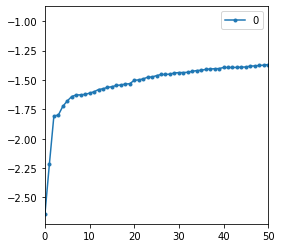

In [496]:
#############################################
# Çok Değişkenli Aykırı Değer Analizi: Local Outlier Factor
#############################################

#### tek başına aykırı olmayacak değerler birlikte aykırı değer olabilirler
#### örneğin 2-3 kez evlenmek aykırı değer değildir.
#### örneğin 17 yaşında olmak aykırı değer değildir.
#### 17, 3  >>> ama 17 yaşında 3 kez evlenmiş olmak aykırı değerdir. Buna çok değişkenli etki denir.

#### LOF Yöntemi çok değişkenli aykırı değer yöntemidir.
#### LOF Yöntemi-- 1den uzaklaştıkça outlier olma ihtimali artar.

#### LOF Yöntemi-- elimizde 100 değişken varsa bunu PCA ile iki değişkene indirgeyip 2 değişkenli gibi outlierları görselleştirebiliriz

clf = LocalOutlierFactor(n_neighbors=20) 
# öntanımlı değer 20 dir. istenirse5,10vs seçilebilir. 
#ama hangi sayı daha iyi yorumlayamayacağımız için 20yi seçmek mantıklı olabilir.
clf.fit_predict(dff.fillna(0))     #.drop(["customerID"],axis=1)
df_scores = clf.negative_outlier_factor_
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

In [497]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [500]:
np.sort(df_scores)[:5]

array([-2.63992636, -2.21397543, -1.80682687, -1.79877037, -1.72461838])

In [501]:
th = np.sort(df_scores)[2]
th

-1.8068268717026412

In [502]:
df[df_scores < th]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1637,4999-IEZLT,Male,0,No,No,66.000,No,No phone service,DSL,No,No,No,Yes,No,No,One year,No,Credit card (automatic),29.450,1983.15,0
5264,9309-BZGNT,Male,1,Yes,No,69.000,No,No phone service,DSL,No,No,Yes,No,No,No,One year,Yes,Credit card (automatic),29.800,2134.3,0


In [503]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
tenure,7043.000,32.371,24.559,0.000,1.000,1.000,29.000,55.000,69.000,72.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,19.200,19.650,70.350,89.850,102.600,114.729,118.750


In [148]:
#df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index) # inplace olmadığı için kalıcı olarak silmedi

In [504]:
#############################################
# Missing Values (Eksik Değerler)
#############################################

#############################################
# Eksik Değerlerin Yakalanması/Analiz edilmesi
#############################################
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

na_cols =missing_values_table(df, True)
#na_cols

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


<!-- # #############################################
# # Eksik Değer Problemini Çözme
# ############################################# -->

#############################################
# Eksik Değer Problemini Çözme
#############################################

In [ ]:
# #############################################
# # Eksik Değer Problemini Çözme
# #############################################

# ###################
# # Çözüm 1: Hızlıca silmek
# ###################
# df.dropna().shape

# ###################
# # Çözüm 2: Basit Atama Yöntemleri ile Doldurmak
# ###################

# df["Age"].fillna(df["Age"].mean()).isnull().sum()
# df["Age"].fillna(df["Age"].median()).isnull().sum()
# df["Age"].fillna(0).isnull().sum()

# # df.apply(lambda x: x.fillna(x.mean()), axis=0)

# df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()

# dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

# dff.isnull().sum().sort_values(ascending=False)

# df["Embarked"].fillna(df["Embarked"].mode()[0]).isnull().sum()

# df["Embarked"].fillna("missing")

# df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()


# ###################
# # Çözüm 3: İleri Seviye Atama Yöntemleri ile Doldurmak
# ###################

# # df.apply(lambda x: x.fillna(x.mean()), axis=0)

# df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()



# ###################
# # Kategorik Değişken Kırılımında Değer Atama
# ###################
# df.groupby("Sex")["Age"].mean()

# df["Age"].mean()

# df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

# df.groupby("Sex")["Age"].mean()["female"]

# df.loc[(df["Age"].isnull()) & (df["Sex"]=="female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]

# df.loc[(df["Age"].isnull()) & (df["Sex"]=="male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]

# df.isnull().sum()

# # yukarıdaki işlemi farklı şekilde yapmak istersek
# df.loc[(df["Age"].isnull()) & (df["Sex"]=="female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]
# df.loc[(df["Age"].isnull()) & (df["Sex"]=="male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]




# #############################################
# # Çözüm 3: Tahmine Dayalı Atama ile Doldurma
# #############################################

# df = load()

# cat_cols, num_cols, cat_but_car = grab_col_names(df)
# num_cols = [col for col in num_cols if col not in "PassengerId"]
# dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)

# dff.head()

# # değişkenlerin standartlatırılması
# scaler = MinMaxScaler()
# dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
# dff.head()


# # knn'in uygulanması.
# # knn----uzaklık temelli bir algoritma olduğu için değişkenleri standartlaştırmalıyız.
# # cat değişkenleri one-hot-encoding yapmamızı bekler algoritma.
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
# dff.head()

# dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)

# df["age_imputed_knn"] = dff[["Age"]]

# df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]]
# df.loc[df["Age"].isnull()]


# ###################
# # Recap
# ###################

# df = load()
# # missing table
# missing_values_table(df)
# # sayısal değişkenleri direk median ile oldurma
# df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()
# # kategorik değişkenleri mode ile doldurma
# df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()
# # kategorik değişken kırılımında sayısal değişkenleri doldurmak
# df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
# # Tahmine Dayalı Atama ile Doldurma

In [506]:
#df=load()

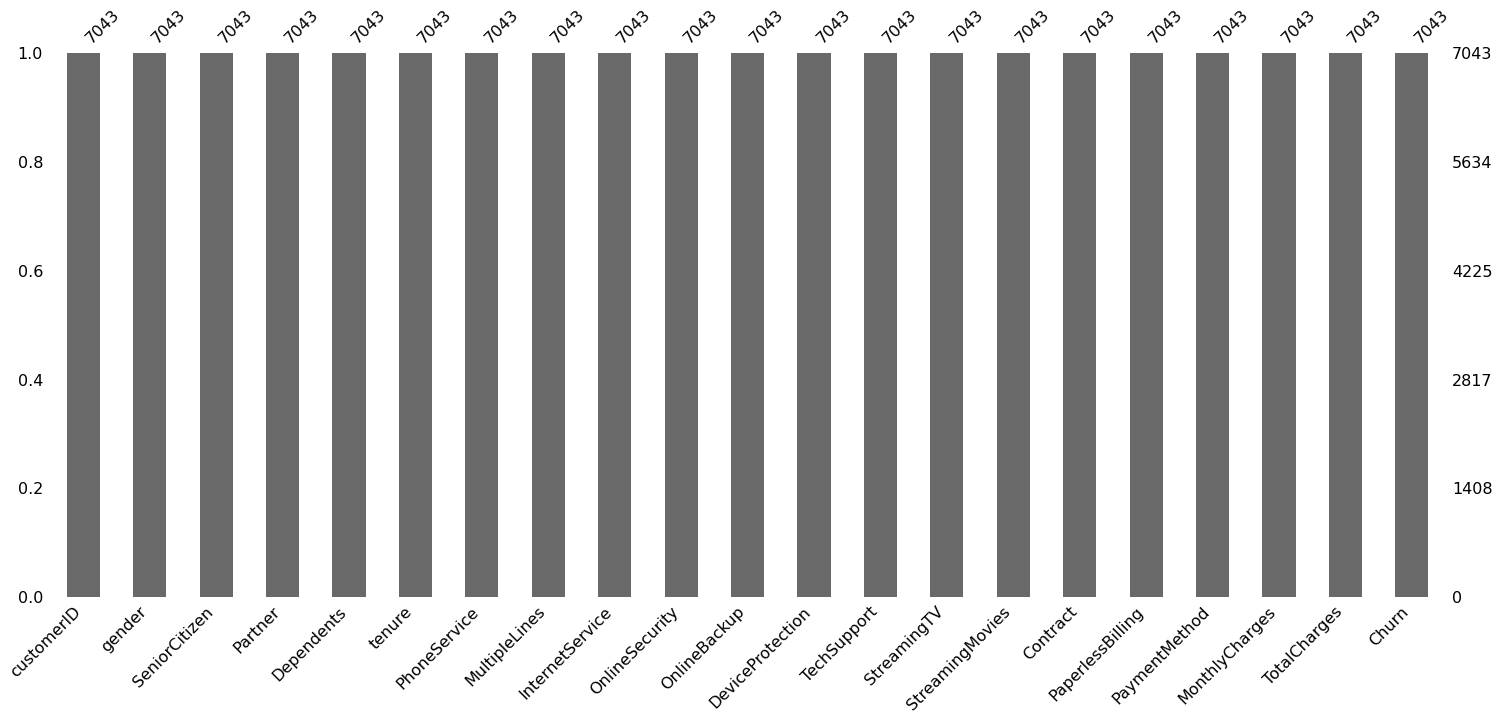

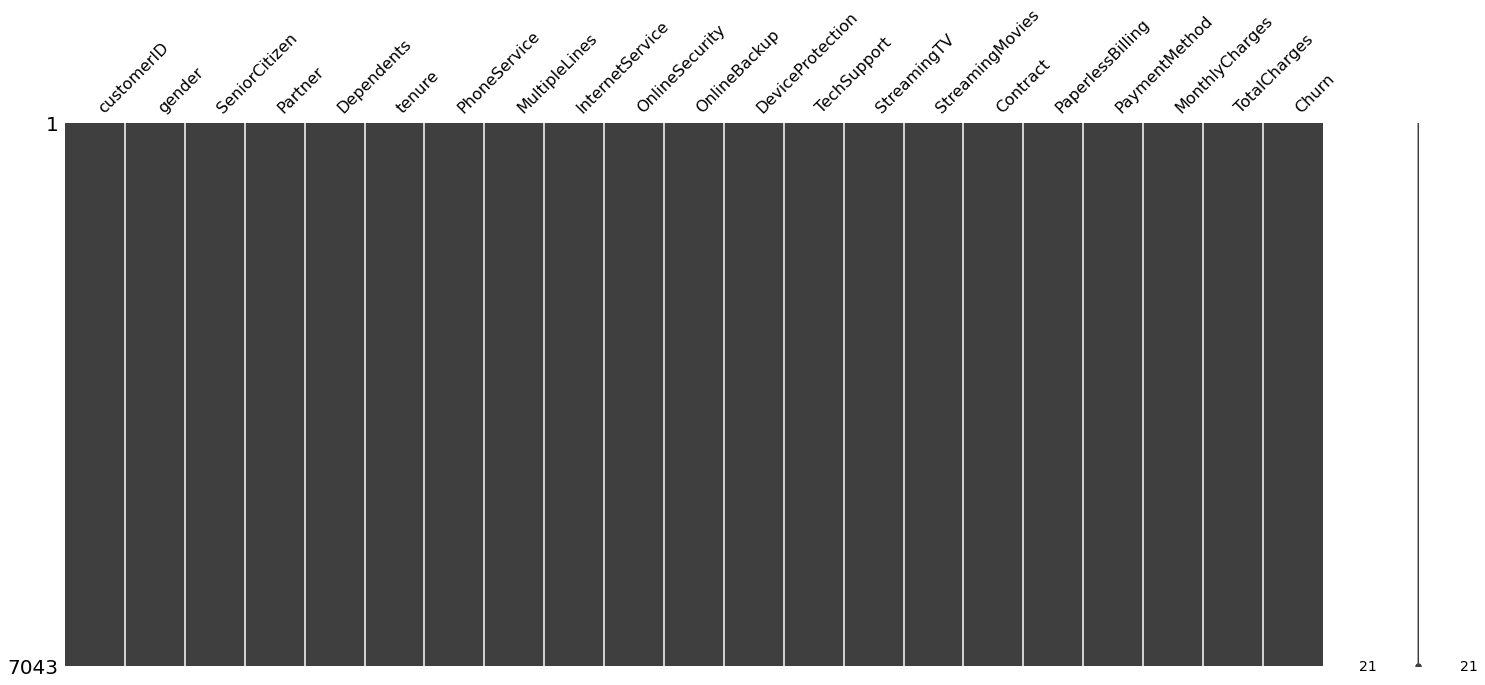

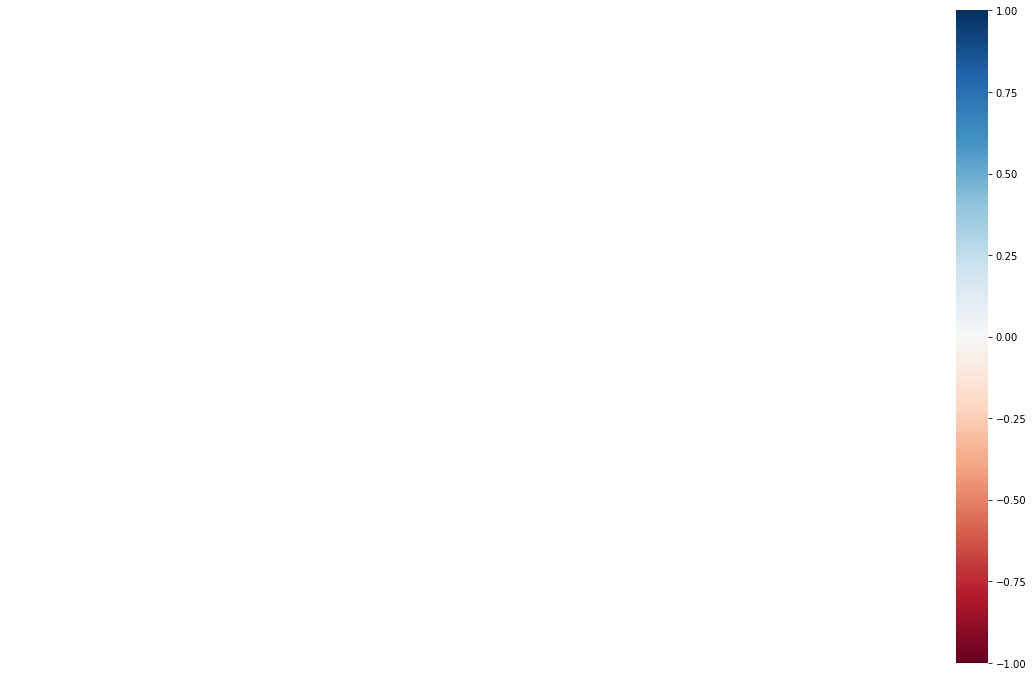

In [507]:
#############################################
# Gelişmiş Analizler
#############################################

###################
# Eksik Veri Yapısının İncelenmesi
###################

msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()

In [512]:
###################
# Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi
###################

na_cols = missing_values_table(df, True)


def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, target, na_cols)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [513]:
#df["Age"].quantile([0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])

In [ ]:
# ####  Görev 2 : Feature Engineering
# Adım 1: Eksik ve aykırı değerler için gerekli işlemleri yapınız. Veri setinde eksik gözlem bulunmamakta ama Glikoz, Insulin vb. 
# değişkenlerde 0 değeri içeren gözlem birimleri eksik değeri ifade ediyor olabilir. Örneğin; bir kişinin glikoz veya insulin değeri 0 
# olamayacaktır. Bu durumu dikkate alarak sıfır değerlerini ilgili değerlerde NaN olarak atama yapıp sonrasında eksik 
# değerlere işlemleri uygulayabilirsiniz.
# Adım 2: Yeni değişkenler oluşturunuz.
# Adım 3: Encoding işlemlerini gerçekleştiriniz.
# Adım 4: Numerik değişkenler için standartlaştırma yapınız.
# Adım 5: Model oluşturunuz.


In [543]:
df=dff.copy()
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1
0,0,1,29.850,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.950,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.850,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.300,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.700,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.800,1,1,1,1,0,1,0,0,0,...,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.200,0,1,1,1,0,1,1,0,0,...,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.600,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.400,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0,1,1


In [544]:
df["tenure/MonthlyCharges"]=df["tenure"]/df["MonthlyCharges"]
df["tenure*MonthlyCharges"]=df["tenure"]*df["MonthlyCharges"]
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1,tenure/MonthlyCharges,tenure*MonthlyCharges
0,0,1,29.850,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0.034,29.850
1,0,34,56.950,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0.597,1936.300
2,0,2,53.850,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1,0.037,107.700
3,0,45,42.300,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1.064,1903.500
4,0,2,70.700,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1,0.028,141.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.800,1,1,1,1,0,1,0,0,0,...,1,0,1,1,0,1,0,0,1,0,0.283,2035.200
7039,0,72,103.200,0,1,1,1,0,1,1,0,0,...,1,0,1,1,0,1,1,0,0,0,0.698,7430.400
7040,0,11,29.600,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0.372,325.600
7041,1,4,74.400,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,1,0.054,297.600


In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   gender_Male                            7043 non-null   uint8  
 4   Partner_Yes                            7043 non-null   uint8  
 5   Dependents_Yes                         7043 non-null   uint8  
 6   PhoneService_Yes                       7043 non-null   uint8  
 7   MultipleLines_No phone service         7043 non-null   uint8  
 8   MultipleLines_Yes                      7043 non-null   uint8  
 9   InternetService_Fiber optic            7043 non-null   uint8  
 10  InternetService_No                     7043 non-null   uint8  
 11  Onli

In [545]:
df["tenure_"]=""

df.loc[df[df["tenure"]<30].index,"tenure_"]="0_30"
df.loc[df[df["tenure"]>=30][df["tenure"]<40].index,"tenure_"]="30_40"
df.loc[df[df["tenure"]>=40].index,"tenure_"]="40_+"
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1,tenure/MonthlyCharges,tenure*MonthlyCharges,tenure_
0,0,1,29.850,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0.034,29.850,0_30
1,0,34,56.950,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.597,1936.300,30_40
2,0,2,53.850,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0.037,107.700,0_30
3,0,45,42.300,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.064,1903.500,40_+
4,0,2,70.700,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0.028,141.400,0_30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.800,1,1,1,1,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,0.283,2035.200,0_30
7039,0,72,103.200,0,1,1,1,0,1,1,0,0,...,0,1,1,0,1,1,0,0,0,0.698,7430.400,40_+
7040,0,11,29.600,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0.372,325.600,0_30
7041,1,4,74.400,1,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0.054,297.600,0_30


In [546]:
###################
# Numeric to Categorical: Sayısal Değişkenleri Kateorik Değişkenlere Çevirme
# Binning
###################

df["tenure_qcut"] = pd.qcut(df['tenure'], 5) 
df.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1,tenure/MonthlyCharges,tenure*MonthlyCharges,tenure_,tenure_qcut
0,0,1,29.850,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0.034,29.850,0_30,"(-0.001, 6.0]"
1,0,34,56.950,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.597,1936.300,30_40,"(20.0, 40.0]"
2,0,2,53.850,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0.037,107.700,0_30,"(-0.001, 6.0]"
3,0,45,42.300,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1.064,1903.500,40_+,"(40.0, 60.0]"
4,0,2,70.700,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0.028,141.400,0_30,"(-0.001, 6.0]"


In [547]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    
    return dataframe

# cat_cols, num_cols, cat_but_car = grab_col_names(df)

ohe_cols = [col for col in df.columns if 20 >= df[col].nunique() > 2]
print(ohe_cols)


df2=one_hot_encoder(df, ohe_cols).head()
df2

['tenure_', 'tenure_qcut']


,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1,tenure/MonthlyCharges,tenure*MonthlyCharges,tenure__30_40,tenure__40_+,"tenure_qcut_(6.0, 20.0]","tenure_qcut_(20.0, 40.0]","tenure_qcut_(40.0, 60.0]","tenure_qcut_(60.0, 72.0]"
0,0,1,29.850,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0.034,29.850,0,0,0,0,0,0
1,0,34,56.950,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0.597,1936.300,1,0,0,1,0,0
2,0,2,53.850,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0.037,107.700,0,0,0,0,0,0
3,0,45,42.300,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1.064,1903.500,0,1,0,0,1,0
4,0,2,70.700,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0.028,141.400,0,0,0,0,0,0


In [531]:
#one hot encoding yapmaya gerek olmayan kolonlar---eksik kaldı.tamamla!!!!!!!!!!!!!!!!1


new_ohe_cols=[]
for col in df.columns:

    ls=list(df[col].unique())
    ls2=ls
    #print(ls)
    if np.nan in ls:
        ls2=ls
        ls2.remove(np.nan)
    degiskende_sadece_sayilar_mi_var=all([isinstance(item, int) for item in ls2])
    if degiskende_sadece_sayilar_mi_var:
        new_ohe_cols.append(col)
new_ohe_cols
    
    

[]

In [532]:
def col_nan_oluştur(df):
    for col in df.columns:
        if df[col].isna().any():
            df[col+"_nan"]=0
            df.loc[df[col].isna(),col+"_nan"]=1
    return df
df=col_nan_oluştur(df)
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure/MonthlyCharges,tenure*MonthlyCharges,tenure_,tenure_qcut
0,0,1,29.850,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0.034,29.850,0_30,"(-0.001, 6.0]"
1,0,34,56.950,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.597,1936.300,30_40,"(20.0, 40.0]"
2,0,2,53.850,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0.037,107.700,0_30,"(-0.001, 6.0]"
3,0,45,42.300,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1.064,1903.500,40_+,"(40.0, 60.0]"
4,0,2,70.700,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0.028,141.400,0_30,"(-0.001, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.800,1,1,1,1,0,1,0,0,0,...,1,1,0,1,0,0,1,0,0.283,2035.200,0_30,"(20.0, 40.0]"
7039,0,72,103.200,0,1,1,1,0,1,1,0,0,...,1,1,0,1,1,0,0,0,0.698,7430.400,40_+,"(60.0, 72.0]"
7040,0,11,29.600,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0.372,325.600,0_30,"(6.0, 20.0]"
7041,1,4,74.400,1,1,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,1,0.054,297.600,0_30,"(-0.001, 6.0]"


In [533]:
mms = MinMaxScaler()
for col in df.columns:
    if df[col].nunique()>20:
        ls=list(df[col].unique())
    if np.nan not in ls:
        degiskende_sadece_sayilar_mi_var=(all([isinstance(item, int) for item in ls2]),all([isinstance(item, float) for item in ls2]))
        
        if degiskende_sadece_sayilar_mi_var:
            try:
                df[col] = mms.fit_transform(df[[col]])
            except:
                print("HATA VAR")
df

HATA VAR
HATA VAR


,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure/MonthlyCharges,tenure*MonthlyCharges,tenure_,tenure_qcut
0,0.000,0.014,0.115,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.009,0.003,0_30,"(-0.001, 6.0]"
1,0.000,0.472,0.385,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.160,0.226,30_40,"(20.0, 40.0]"
2,0.000,0.028,0.354,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.010,0.013,0_30,"(-0.001, 6.0]"
3,0.000,0.625,0.239,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.285,0.223,40_+,"(40.0, 60.0]"
4,0.000,0.028,0.522,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.008,0.017,0_30,"(-0.001, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.000,0.333,0.662,1.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,...,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.076,0.238,0_30,"(20.0, 40.0]"
7039,0.000,1.000,0.845,0.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,...,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.187,0.869,40_+,"(60.0, 72.0]"
7040,0.000,0.153,0.113,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.100,0.038,0_30,"(6.0, 20.0]"
7041,1.000,0.056,0.559,1.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.014,0.035,0_30,"(-0.001, 6.0]"


In [536]:
dff

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.850,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.950,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.850,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.300,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.700,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.800,1,1,1,1,0,1,0,0,0,...,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.200,0,1,1,1,0,1,1,0,0,...,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.600,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.400,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0,1,1


In [548]:
dff1=dff.copy()
df1=df.copy()
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1,tenure/MonthlyCharges,tenure*MonthlyCharges,tenure_,tenure_qcut
0,0,1,29.850,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0.034,29.850,0_30,"(-0.001, 6.0]"
1,0,34,56.950,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.597,1936.300,30_40,"(20.0, 40.0]"
2,0,2,53.850,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0.037,107.700,0_30,"(-0.001, 6.0]"
3,0,45,42.300,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1.064,1903.500,40_+,"(40.0, 60.0]"
4,0,2,70.700,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0.028,141.400,0_30,"(-0.001, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.800,1,1,1,1,0,1,0,0,0,...,1,1,0,1,0,0,1,0,0.283,2035.200,0_30,"(20.0, 40.0]"
7039,0,72,103.200,0,1,1,1,0,1,1,0,0,...,1,1,0,1,1,0,0,0,0.698,7430.400,40_+,"(60.0, 72.0]"
7040,0,11,29.600,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0.372,325.600,0_30,"(6.0, 20.0]"
7041,1,4,74.400,1,1,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,1,0.054,297.600,0_30,"(-0.001, 6.0]"


In [549]:
dfff = pd.get_dummies(df, columns=["tenure_","tenure_qcut"], drop_first=True)
dfff

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1,tenure/MonthlyCharges,tenure*MonthlyCharges,tenure__30_40,tenure__40_+,"tenure_qcut_(6.0, 20.0]","tenure_qcut_(20.0, 40.0]","tenure_qcut_(40.0, 60.0]","tenure_qcut_(60.0, 72.0]"
0,0,1,29.850,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0.034,29.850,0,0,0,0,0,0
1,0,34,56.950,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0.597,1936.300,1,0,0,1,0,0
2,0,2,53.850,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0.037,107.700,0,0,0,0,0,0
3,0,45,42.300,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1.064,1903.500,0,1,0,0,1,0
4,0,2,70.700,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0.028,141.400,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.800,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0.283,2035.200,0,0,0,1,0,0
7039,0,72,103.200,0,1,1,1,0,1,1,0,0,...,1,0,0,0,0.698,7430.400,0,1,0,0,0,1
7040,0,11,29.600,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0.372,325.600,0,0,1,0,0,0
7041,1,4,74.400,1,1,0,1,0,1,1,0,0,...,0,0,1,1,0.054,297.600,0,0,0,0,0,0


In [552]:
dfff.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn_1', 'tenure/MonthlyCharges', 'tenure*MonthlyCharges', 'tenure__30_40', 'tenure__40_+', 'tenure_qcut_(6.0, 20.0]', 'tenure_qcut_(20.0, 40.0]', 'tenure_qcut_(40.0, 60.0]', 'tenure_qcut_(60.0, 72.0]'],
      dtype='object')

In [553]:
dff

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1
0,0,1,29.850,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.950,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.850,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.300,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.700,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.800,1,1,1,1,0,1,0,0,0,...,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.200,0,1,1,1,0,1,1,0,0,...,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.600,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.400,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0,1,1


In [554]:
#############################################
# 8. Model
#############################################
dff.replace([np.inf, -np.inf], np.nan, inplace=True)
dff=dff.fillna(0)


y = dff["Churn_1"]
X = dff.drop([ "Churn_1"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.77520113582584